In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('Car details.csv')

In [4]:
#univariate analysis -- 
#countplot -categorical data
#histogram -numerical data

In [5]:
df.head().T

0                             1  \
name           Maruti Swift Dzire VDI  Skoda Rapid 1.5 TDI Ambition   
year                             2014                          2014   
selling_price                  450000                        370000   
km_driven                      145500                        120000   
fuel                           Diesel                        Diesel   
seller_type                Individual                    Individual   
transmission                   Manual                        Manual   
owner                     First Owner                  Second Owner   
mileage                     23.4 kmpl                    21.14 kmpl   
engine                        1248 CC                       1498 CC   
max_power                      74 bhp                    103.52 bhp   
torque                 190Nm@ 2000rpm           250Nm@ 1500-2500rpm   
seats                               5                             5   

                                      2                          3  \
name           Honda City 2017-2020 EXi  Hyundai i20 Sportz Diesel   
year                               2006                       2010   
selling_price                    158000                     225000   
km_driven                        140000                     127000   
fuel                             Petrol                     Diesel   
seller_type                  Individual                 Individual   
transmission                     Manual                     Manual   
owner                       Third Owner                First Owner   
mileage                       17.7 kmpl                  23.0 kmpl   
engine                          1497 CC                    1396 CC   
max_power                        78 bhp                     90 bhp   
torque            12.7@ 2,700(kgm@ rpm)   22.4 kgm at 1750-2750rpm   
seats                                 5                          5   

                                    4  
name           Maruti Swift VXI BSIII  
year                             2007  
selling_price                  130000  
km_driven                      120000  
fuel                           Petrol  
seller_type                Individual  
transmission                   Manual  
owner                     First Owner  
mileage                     16.1 kmpl  
engine                        1298 CC  
max_power                    88.2 bhp  
torque          11.5@ 4,500(kgm@ rpm)  
seats                               5

<AxesSubplot:xlabel='fuel', ylabel='count'>

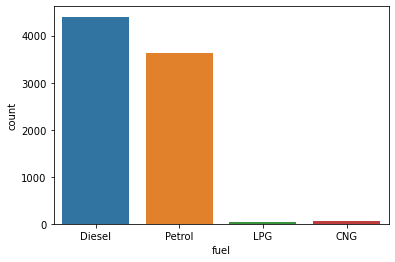

In [6]:
sns.countplot(x=df['fuel'])

In [7]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='count'>

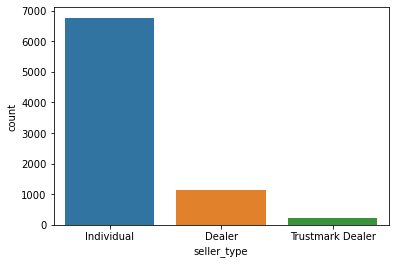

In [8]:
sns.countplot(x=df['seller_type'])

<AxesSubplot:xlabel='transmission', ylabel='count'>

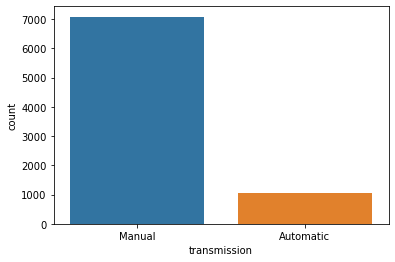

In [9]:
sns.countplot(x=df['transmission'])

<AxesSubplot:xlabel='owner', ylabel='count'>

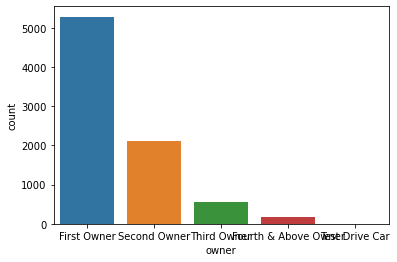

In [10]:
sns.countplot(x=df['owner'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

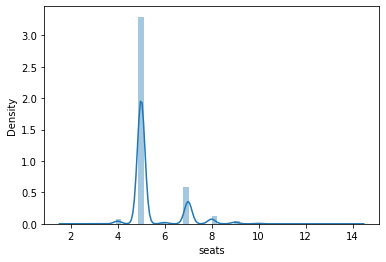

In [11]:
sns.distplot(df['seats'])

In [12]:
sns.distplot(df['car_age'],bins=60,hist_kws=dict(edgecolor="black",linewidth=2))

KeyError: 'car_age'

In [13]:
sns.distplot(df['new_max_power'])

KeyError: 'new_max_power'

In [ ]:
#bivariate analysis

In [14]:
#corelation matrix
cormat=df.corr()

In [15]:
cormat

year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000

<AxesSubplot:>

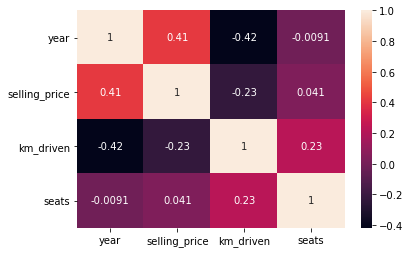

In [16]:
sns.heatmap(cormat,annot=True)

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

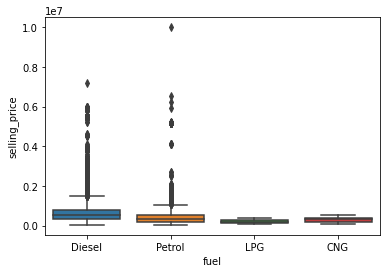

In [17]:
sns.boxplot(x=df['fuel'],y=df['selling_price'])

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

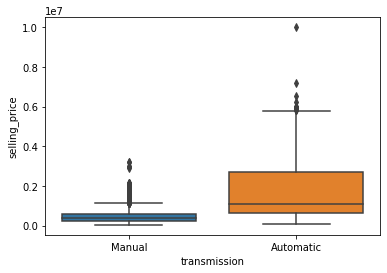

In [18]:
sns.boxplot(x=df['transmission'],y=df['selling_price'])

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

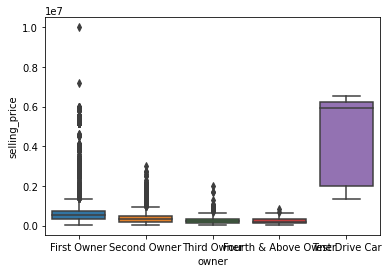

In [19]:
#investigating reason behind high car price for test drive cars
sns.boxplot(x=df['owner'],y=df['selling_price'])

In [20]:
df[df['owner']=='First Owner']['selling_price']

0       450000
3       225000
4       130000
5       440000
6        96000
         ...  
8120    120000
8123    320000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 5289, dtype: int64

In [21]:
#taking mean of selling price for 1st owner
df[df['owner']=='First Owner']['selling_price'].mean()

783086.4144450747

In [23]:
df[df['owner']=='Second Owner']['selling_price'].mean()

392964.46840855107

In [24]:
df[df['owner']=='Third Owner']['selling_price'].mean()

284015.3315315315

In [30]:
df[df['owner']=='Fourth & Above Owner']['selling_price'].mean()

225813.1724137931

In [32]:
df[df['owner']=='Test Drive Car']['selling_price'].mean()

4403800.0

In [33]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [37]:
df[df['owner']=='Test Drive Car']

name  year  selling_price  km_driven  \
4383  Volkswagen Vento 1.5 TDI Highline BSIV  2019        1350000       5400   
4950                  Audi A6 35 TFSI Matrix  2019        6223000       7800   
4951                  Audi A6 35 TFSI Matrix  2019        5923000      11500   
4952                  Audi A6 35 TFSI Matrix  2019        6523000      23600   
6220                          Honda Civic ZX  2019        2000000      24857   

        fuel seller_type transmission           owner     mileage   engine  \
4383  Diesel      Dealer       Manual  Test Drive Car  22.27 kmpl  1498 CC   
4950  Petrol      Dealer    Automatic  Test Drive Car  15.26 kmpl  1798 CC   
4951  Petrol      Dealer    Automatic  Test Drive Car  15.26 kmpl  1798 CC   
4952  Petrol      Dealer    Automatic  Test Drive Car  15.26 kmpl  1798 CC   
6220  Petrol      Dealer    Automatic  Test Drive Car   16.5 kmpl  1799 CC   

       max_power               torque  seats  
4383   108.6 bhp  250Nm@ 1500-3000rpm    5.0  
4950  187.74 bhp  320Nm@ 1400-4100rpm    5.0  
4951  187.74 bhp  320Nm@ 1400-4100rpm    5.0  
4952  187.74 bhp  320Nm@ 1400-4100rpm    5.0  
6220  139.46 bhp       174Nm@ 4300rpm    5.0

In [36]:
df[df['owner']=='Test Drive Car']['selling_price']

4383    1350000
4950    6223000
4951    5923000
4952    6523000
6220    2000000
Name: selling_price, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

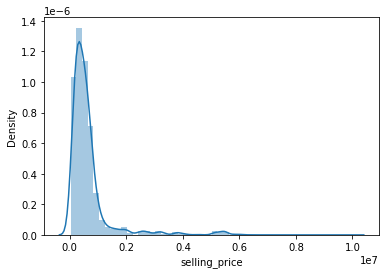

In [38]:
sns.distplot(df['selling_price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

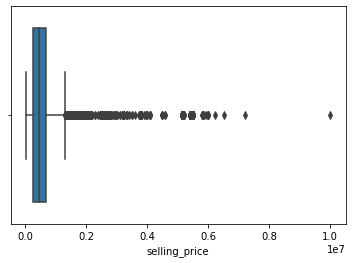

In [39]:
sns.boxplot(df['selling_price'])

254999.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

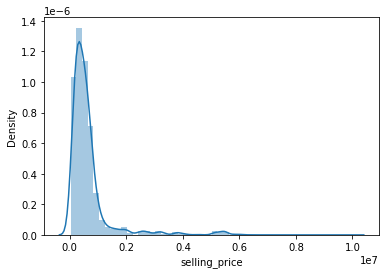

In [27]:
sns.distplot(df['selling_price'])

In [41]:
from scipy import stats
Q1=df['selling_price'].quantile(0.25)
Q1

254999.0

In [42]:
Q3=df['selling_price'].quantile(0.75)
Q3

675000.0

In [43]:
IQR=Q3-Q1
IQR

420001.0

In [44]:
from scipy import stats
IQR = stats.iqr(df['selling_price'])
IQR

420001.0

In [45]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-375002.5, 1305001.5)

In [47]:
df_outliers=df[(df['selling_price']<lower_limit)|(df['selling_price']>upper_limit)]

In [48]:
df_outliers.shape

(600, 13)

In [56]:
index= df[(df['selling_price']<lower_limit)|(df['selling_price']>upper_limit)].index
index

Int64Index([  41,   47,   49,   55,   57,   58,   59,   60,   75,   82,
            ...
            7920, 7922, 7925, 7930, 7931, 7949, 7967, 7973, 8058, 8108],
           dtype='int64', length=600)

In [57]:
df.drop(index, inplace=True)

In [58]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

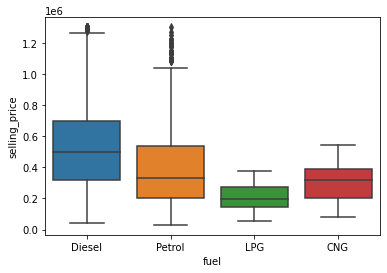

In [59]:
sns.boxplot(x=df['fuel'],y=df['selling_price'])

In [60]:
#encoding of categorical features -- one hot encoding
pd.get_dummies(df['fuel'],drop_first=True)

Diesel  LPG  Petrol
0          1    0       0
1          1    0       0
2          0    0       1
3          1    0       0
4          0    0       1
...      ...  ...     ...
8123       0    0       1
8124       1    0       0
8125       1    0       0
8126       1    0       0
8127       1    0       0

[7528 rows x 3 columns]

In [61]:
df.owner.value_counts()

First Owner             4747
Second Owner            2055
Third Owner              552
Fourth & Above Owner     174
Name: owner, dtype: int64

In [63]:
df.owner.replace(['First Owner','Second Owner','Third Owner','Fourth & Above Owner'],[4,3,2,1], inplace=True)

In [64]:
df.owner

0       4
1       3
2       2
3       4
4       4
       ..
8123    4
8124    1
8125    4
8126    4
8127    4
Name: owner, Length: 7528, dtype: int64

In [65]:
df.owner.value_counts()

4    4747
3    2055
2     552
1     174
Name: owner, dtype: int64

In [ ]:
1-cleaned data
2-null values/0 values
3-removed duplicates
4-remove outliers

5-univariate analysis
--cat-contplot--clubbed minority values into one category
--numerical-histogram--based on shape of histogram -- apply data transformation e.g.log

6-bivariate
--cat-boxplots
num,--correletion---delete columns which have very low correlation with dependent variable
                ----delete one highly corelated variables to avoid multi-cloinearity
                    or used regulerization based models

7-encoding techniquies for categorical data --> numeric data.        